In [1]:
# Import pandas dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [2]:
# Load cleaned byarea_df
c_byarea_df = pd.read_csv('cleaned_byarea_df.txt', ',')
c_byarea_df.head()

C:\Users\yingk\anaconda3\envs\mlenv\lib\site-packages\IPython\core\interactiveshell.py:3457: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only
  exec(code_obj, self.user_global_ns, self.user_ns)


,AREA,AGE_ADJUSTED_CI_LOWER,AGE_ADJUSTED_CI_UPPER,AGE_ADJUSTED_RATE,EVENT_TYPE,POPULATION,RACE,SEX,SITE,YEAR,CRUDE_CI_LOWER,CRUDE_CI_UPPER,CRUDE_RATE
0,Alabama,359.7,374.7,367.2,Incidence,2293259,All Races,Female,All Cancer Sites Combined,1999,397.3,413.8,405.5
1,Alabama,160.6,170.5,165.5,Mortality,2293259,All Races,Female,All Cancer Sites Combined,1999,184.8,196.1,190.4
2,Alabama,362.1,377.1,369.5,Incidence,2302835,All Races,Female,All Cancer Sites Combined,2000,403.2,419.8,411.4
3,Alabama,160.8,170.6,165.7,Mortality,2302835,All Races,Female,All Cancer Sites Combined,2000,186.5,197.9,192.2
4,Alabama,377.7,392.9,385.2,Incidence,2309496,All Races,Female,All Cancer Sites Combined,2001,423.3,440.3,431.7


In [3]:
# check c_byarea_df columns
c_byarea_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 949308 entries, 0 to 949307
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   AREA                   949308 non-null  object 
 1   AGE_ADJUSTED_CI_LOWER  949308 non-null  float64
 2   AGE_ADJUSTED_CI_UPPER  949308 non-null  float64
 3   AGE_ADJUSTED_RATE      949308 non-null  float64
 4   EVENT_TYPE             949308 non-null  object 
 5   POPULATION             949308 non-null  int64  
 6   RACE                   949308 non-null  object 
 7   SEX                    949308 non-null  object 
 8   SITE                   949308 non-null  object 
 9   YEAR                   949308 non-null  int64  
 10  CRUDE_CI_LOWER         949308 non-null  float64
 11  CRUDE_CI_UPPER         949308 non-null  float64
 12  CRUDE_RATE             949308 non-null  float64
dtypes: float64(6), int64(2), object(5)
memory usage: 94.2+ MB


In [4]:
# load smoking_rate.csv file
smoking_df = pd.read_csv('smoking_rate.csv')
smoking_df

,State,2018,2019,2020
0,Alabama,19.2,20.2,17.2
1,Alaska,19.1,17.4,17.1
2,Arizona,14.0,14.9,13.1
3,Arkansas,22.7,20.2,21.1
4,California,11.2,10.0,8.8
5,Colorado,14.5,13.5,12.0
6,Connecticut,12.2,12.1,11.1
7,Delaware,16.5,15.9,13.4
8,District of Columbia,13.8,12.7,9.5
9,Florida,14.5,14.8,14.7


## prepare smoking data

In [5]:
# reshape smoking_df to long form to merge with cancer data
# how to: https://towardsdatascience.com/how-to-reshape-a-pandas-dataframe-98b42c428a8

# first need to rename each column in order to use the wide_to_long()
smoking_df.rename(columns={'2018':'smoking_2018',
                          '2019':'smoking_2019',
                          '2020': 'smoking_2020'}, inplace=True)

In [6]:
smoking_df.head()

,State,smoking_2018,smoking_2019,smoking_2020
0,Alabama,19.2,20.2,17.2
1,Alaska,19.1,17.4,17.1
2,Arizona,14.0,14.9,13.1
3,Arkansas,22.7,20.2,21.1
4,California,11.2,10.0,8.8


In [7]:
# convert smoking_df to long format
smoking_long_df = pd.wide_to_long(smoking_df, 
                              stubnames=['smoking'],
                              i='State',
                              j='YEAR',
                              sep="_",
                              suffix='\w+')
smoking_long_df

,,smoking
State,YEAR,
Alabama,2018,19.2
Alaska,2018,19.1
Arizona,2018,14.0
Arkansas,2018,22.7
California,2018,11.2
...,...,...
Virginia,2020,12.4
Washington,2020,10.8
West Virginia,2020,22.0


In [8]:
# Adding back index for ease of merging later
smoking_long_df = smoking_long_df.reset_index()
smoking_long_df

,State,YEAR,smoking
0,Alabama,2018,19.2
1,Alaska,2018,19.1
2,Arizona,2018,14.0
3,Arkansas,2018,22.7
4,California,2018,11.2
...,...,...,...
154,Virginia,2020,12.4
155,Washington,2020,10.8
156,West Virginia,2020,22.0
157,Wisconsin,2020,13.3


## prepare cancer data

In [9]:
# filter for rows for state lung cancer mortality rate by all sex and race 
state_lung_df = c_byarea_df.loc[(c_byarea_df['EVENT_TYPE']=='Mortality') &
                              (c_byarea_df['SEX']=='Male and Female') &
                              (c_byarea_df['RACE']=='All Races') &
                              (c_byarea_df['SITE']=='Lung and Bronchus') &
                              (c_byarea_df['YEAR']!= 20152019)
                              ]
state_lung_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1071 entries, 2575 to 933049
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   AREA                   1071 non-null   object 
 1   AGE_ADJUSTED_CI_LOWER  1071 non-null   float64
 2   AGE_ADJUSTED_CI_UPPER  1071 non-null   float64
 3   AGE_ADJUSTED_RATE      1071 non-null   float64
 4   EVENT_TYPE             1071 non-null   object 
 5   POPULATION             1071 non-null   int64  
 6   RACE                   1071 non-null   object 
 7   SEX                    1071 non-null   object 
 8   SITE                   1071 non-null   object 
 9   YEAR                   1071 non-null   int64  
 10  CRUDE_CI_LOWER         1071 non-null   float64
 11  CRUDE_CI_UPPER         1071 non-null   float64
 12  CRUDE_RATE             1071 non-null   float64
dtypes: float64(6), int64(2), object(5)
memory usage: 117.1+ KB


In [10]:
state_lung_df.head()

,AREA,AGE_ADJUSTED_CI_LOWER,AGE_ADJUSTED_CI_UPPER,AGE_ADJUSTED_RATE,EVENT_TYPE,POPULATION,RACE,SEX,SITE,YEAR,CRUDE_CI_LOWER,CRUDE_CI_UPPER,CRUDE_RATE
2575,Alabama,60.2,64.8,62.5,Mortality,4430141,All Races,Male and Female,Lung and Bronchus,1999,62.0,66.8,64.4
2577,Alabama,61.9,66.6,64.2,Mortality,4452173,All Races,Male and Female,Lung and Bronchus,2000,64.2,69.0,66.6
2579,Alabama,60.3,64.9,62.6,Mortality,4467634,All Races,Male and Female,Lung and Bronchus,2001,62.8,67.6,65.2
2581,Alabama,61.3,65.9,63.5,Mortality,4480089,All Races,Male and Female,Lung and Bronchus,2002,64.3,69.2,66.7
2583,Alabama,62.7,67.3,65.0,Mortality,4503491,All Races,Male and Female,Lung and Bronchus,2003,66.6,71.5,69.0


In [11]:
# Pick out just the columns needed for our linear regression analysis
# CRUDE_RATE as the independent variable
state_lr_df = state_lung_df[['AREA', 'YEAR', 'CRUDE_RATE']]
state_lr_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1071 entries, 2575 to 933049
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   AREA        1071 non-null   object 
 1   YEAR        1071 non-null   int64  
 2   CRUDE_RATE  1071 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 33.5+ KB


In [12]:
state_lr_df

,AREA,YEAR,CRUDE_RATE
2575,Alabama,1999,64.4
2577,Alabama,2000,66.6
2579,Alabama,2001,65.2
2581,Alabama,2002,66.7
2583,Alabama,2003,69.0
...,...,...,...
933039,Wyoming,2015,36.3
933043,Wyoming,2016,34.9
933045,Wyoming,2017,37.2
933047,Wyoming,2018,37.8


## prepare Linear Regression data

In [13]:
# merge the cancer df and income df using "State" & "Year"
lr_df = pd.merge(smoking_long_df, state_lr_df, how='left', left_on=['State', 'YEAR'], right_on=['AREA', 'YEAR'])
lr_df

,State,YEAR,smoking,AREA,CRUDE_RATE
0,Alabama,2018,19.2,Alabama,60.1
1,Alaska,2018,19.1,Alaska,28.9
2,Arizona,2018,14.0,Arizona,36.9
3,Arkansas,2018,22.7,Arkansas,62.1
4,California,2018,11.2,California,28.1
...,...,...,...,...,...
154,Virginia,2020,12.4,NaN,NaN
155,Washington,2020,10.8,NaN,NaN
156,West Virginia,2020,22.0,NaN,NaN
157,Wisconsin,2020,13.3,NaN,NaN


In [14]:
lr_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 159 entries, 0 to 158
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   State       159 non-null    object 
 1   YEAR        159 non-null    int64  
 2   smoking     156 non-null    float64
 3   AREA        102 non-null    object 
 4   CRUDE_RATE  102 non-null    float64
dtypes: float64(2), int64(1), object(2)
memory usage: 7.5+ KB


In [15]:
# check to see what rows are missing data
# cancer dataset only goes to 2019 & a few missing smoking data points
lr_df[lr_df['AREA'].isnull()]

,State,YEAR,smoking,AREA,CRUDE_RATE
11,Guam,2018,21.9,NaN,NaN
40,Puerto Rico,2018,10.0,NaN,NaN
64,Guam,2019,23.4,NaN,NaN
93,Puerto Rico,2019,9.6,NaN,NaN
106,Alabama,2020,17.2,NaN,NaN
107,Alaska,2020,17.1,NaN,NaN
108,Arizona,2020,13.1,NaN,NaN
109,Arkansas,2020,21.1,NaN,NaN
110,California,2020,8.8,NaN,NaN
111,Colorado,2020,12.0,NaN,NaN


In [16]:
lr_df = lr_df.dropna()
lr_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101 entries, 0 to 105
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   State       101 non-null    object 
 1   YEAR        101 non-null    int64  
 2   smoking     101 non-null    float64
 3   AREA        101 non-null    object 
 4   CRUDE_RATE  101 non-null    float64
dtypes: float64(2), int64(1), object(2)
memory usage: 4.7+ KB


<function matplotlib.pyplot.show(close=None, block=None)>

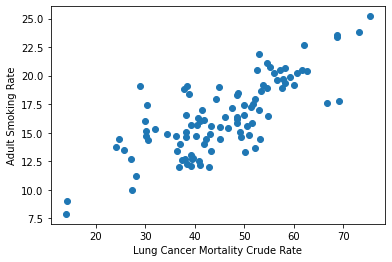

In [17]:
# plot of 101 raw data points
plt.scatter(lr_df.CRUDE_RATE, lr_df.smoking)
plt.xlabel("Lung Cancer Mortality Crude Rate")
plt.ylabel("Adult Smoking Rate")
plt.show

## Supervised ML - Linear Regression

In [18]:
X = lr_df.CRUDE_RATE.values.reshape(-1,1)
X.shape

(101, 1)

In [19]:
y = lr_df.smoking

In [20]:
model = LinearRegression()
model.fit(X,y)

LinearRegression()

In [21]:
y_pred = model.predict(X)
print(y_pred.shape)

(101,)


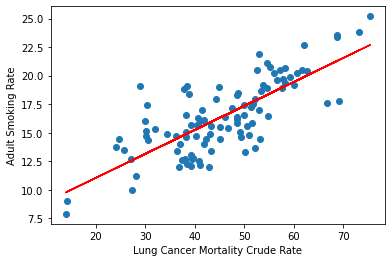

In [22]:
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.xlabel("Lung Cancer Mortality Crude Rate")
plt.ylabel("Adult Smoking Rate")
plt.show()

In [23]:
print(model.coef_)
print(model.intercept_)

[0.20989817]
6.865339447889545


In [24]:
r2_score(y, y_pred)

0.5900813577568428